# Decision Trees

### Objectives
- decision trees for classification problem
- compare to logistic regression (how they each handle feature interactions)
- consider handling of categorical features for decision trees

### Resources
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Let’s Write a Decision Tree Classifier from Scratch (YouTube, 10 mins)](https://www.youtube.com/watch?v=LDRbO9a6XPU)
- [How a Russian mathematician constructed a decision tree - by hand - to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- Categorical encoding for trees
    - [Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)
    - [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
    - [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
    - [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
    - [`category_encoders.target_encoder.OrdinalEncoder`](http://contrib.scikit-learn.org/categorical-encoding/ordinal.html)
    - [`category_encoders.target_encoder.TargetEncoder`](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
    - [`sklearn.preprocessing.LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) + [`sklearn.compose.ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer)
    - [`sklearn.preprocessing.LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) + [`sklearn-pandas`](https://github.com/scikit-learn-contrib/sklearn-pandas)
    - [`kaggler.preprocessing.data.OneHotEncoder(min_obs=...)`](https://pythonhosted.org/Kaggler/kaggler.preprocessing.html#kaggler.preprocessing.data.OneHotEncoder)
    - [Create your own scikit-learn compatible transformers!](https://github.com/PacktPublishing/Hands-On-Machine-Learning-with-Python-and-Scikit-Learn/blob/master/code/Feature%20Engineering.ipynb)

### Libraries

- [dtreeviz](https://explained.ai/decision-tree-viz/) library for decision tree visualizations.
  - Google Colab: `pip install dtreeviz`
  - Mac or Windows: [Installation instructions](https://github.com/parrt/dtreeviz#install) are harder 
- [category_encoders](https://github.com/scikit-learn-contrib/categorical-encoding)
  - Google Colab: `pip install category_encoders`
  - Anaconda: `conda install -c conda-forge category_encoders`
- graphviz
  - `conda install python-graphviz`

## Play Tennis

We'll reproduce the "Play Tennis" example from Ross Quinlan's 1986 paper, [Induction of Decison Trees](https://link.springer.com/content/pdf/10.1007%2FBF00116251.pdf).

[According to Wikipedia](https://en.wikipedia.org/wiki/Ross_Quinlan), "John Ross Quinlan is a computer science researcher in data mining and decision theory. He has contributed extensively to the development of decision tree algorithms, including inventing the canonical C4.5 and ID3 algorithms."

***"Table 1 shows a small training set"***

In [1]:
import pandas as pd

columns = 'No. Outlook Temperature Humidity Windy Class'.split()

raw = """1 sunny hot high false N
2 sunny hot high true N
3 overcast hot high false P
4 rain mild high false P
5 rain cool normal false P
6 rain cool normal true N
7 overcast cool normal true P
8 sunny mild high false N
9 sunny cool normal false P
10 rain mild normal false P
11 sunny mild normal true P
12 overcast mild high true P
13 overcast hot normal false P
14 rain mild high true N"""

data = [row.split() for row in raw.split('\n')]

tennis = pd.DataFrame(data, columns=columns).set_index('No.')

tennis

,Outlook,Temperature,Humidity,Windy,Class
No.,,,,,
1,sunny,hot,high,false,N
2,sunny,hot,high,true,N
3,overcast,hot,high,false,P
4,rain,mild,high,false,P
5,rain,cool,normal,false,P
6,rain,cool,normal,true,N
7,overcast,cool,normal,true,P
8,sunny,mild,high,false,N
9,sunny,cool,normal,false,P


***"A decision tree that correctly classifies each object in the training set is given in Figure 2."***

<img src="https://i.imgur.com/RD7d0u0.png" height="300">

### Explore the data
(and compare to Figure 2 above)

In this dataset, the tennis player decided to play on 9 days, and decided not to on 5 days.

In [2]:
tennis['Class'] = (tennis['Class'] == 'P').astype(int)
tennis['Class'].value_counts()

1    9
0    5
Name: Class, dtype: int64

The tennis player played on 4 overcast days, 3 rainy days, and 2 sunny days.

In [3]:
tennis.groupby('Outlook')['Class'].sum()

Outlook
overcast    4
rain        3
sunny       2
Name: Class, dtype: int32

On sunny days, the tennis player's decision depends on the humidity. (The Outlook and Humidity features interact.)

In [4]:
tennis[tennis['Outlook']=='sunny'].groupby('Humidity')['Class'].sum()

Humidity
high      0
normal    2
Name: Class, dtype: int32

On rainy days, the tennis player's decision depends on the wind. (The Outlook and Windy features interact.)

In [5]:
tennis[tennis['Outlook']=='rain'].groupby('Windy')['Class'].sum()

Windy
false    3
true     0
Name: Class, dtype: int32

### Train a Decision Tree (with One-Hot Encoding)
The tree has 100% accuracy

In [6]:
from sklearn.tree import DecisionTreeClassifier

target_col = 'Class'
X = pd.get_dummies(tennis.drop(columns=target_col))
y = tennis[target_col]

dt = DecisionTreeClassifier()
dt.fit(X, y)
dt.score(X, y)

1.0

### Visualize the tree
With dtreeviz:

In [0]:
from dtreeviz.trees import dtreeviz

dtreeviz(dt, X, y, 
         target_name='Play Tennis',
         feature_names=X.columns, 
         class_names=['No', 'Yes'])

With scikit-learn:

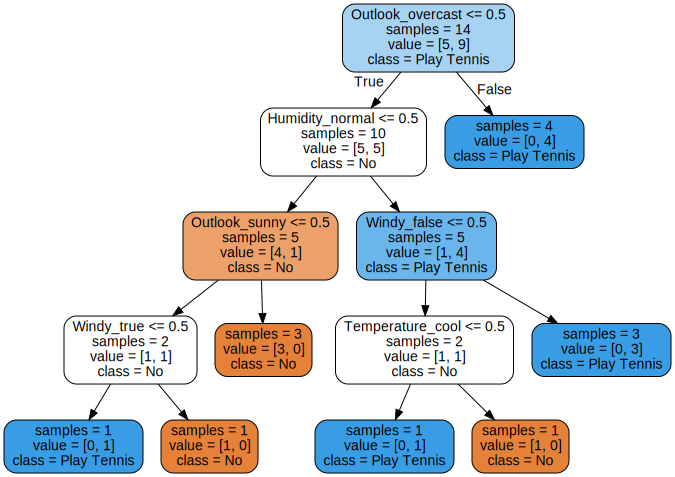

In [7]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns, 
                           class_names=['No', 'Play Tennis'],   
                           filled=True, impurity=False, rounded=True)
graphviz.Source(dot_data)

### Compare to Logistic Regression
Logistic Regression has lower accuracy here:

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)
lr.score(X, y)

0.8571428571428571

The Logistic Regression model has these coefficients:

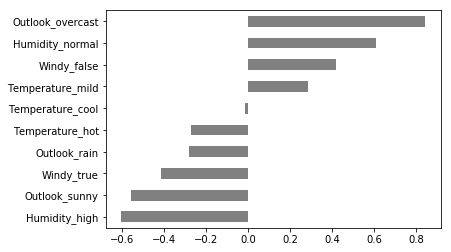

In [10]:
pd.Series(lr.coef_[0], X.columns).sort_values().plot.barh(color='grey');

Logistic regression does OK here. But one weakness of logistic regression is that interation effects must be explicitly explored via feature engineering. Decision trees automatically explore variable interactions

### What if we use "Ordinal" encoding instead of One-Hot?

**Ordinal encoding** assigns numbers to categories in a certain order. However it's applied arbitrarily here.

The decision tree still has 100% accuracy.

In [11]:
import category_encoders as ce

encoder = ce.OrdinalEncoder()
X = encoder.fit_transform(tennis.drop(columns='Class'))
y = tennis['Class']

dt = DecisionTreeClassifier()
dt.fit(X, y)
dt.score(X, y)

1.0

A tree's [feature importances](https://explained.ai/rf-importance/index.html#3) are non-negative. They have magnitude but no direction. We can't determine the direction in which they influence our target.

"Outlook" is the most important feature in this model.

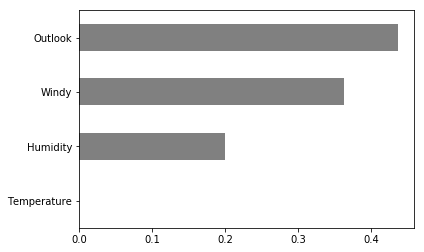

In [12]:
pd.Series(dt.feature_importances_, 
          X.columns).sort_values().plot.barh(color='grey');

With the arbitrary "ordinal" encoding, the Logistic Regression accuracy decreases to 64% (compared to 86% with One-Hot Encoding).

In [13]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)
lr.score(X, y)

0.6428571428571429

Why? Because now the relatioship between some features and target are not **monotonic**:

> In calculus, a function ... is called monotonic if and only if it is either entirely non-increasing, or entirely non-decreasing. - [Wikipedia](https://en.wikipedia.org/wiki/Monotonic_function)

We can look this, one feature at a time.

In [14]:
Xy = pd.concat([X, y], axis='columns')
Xy.groupby('Outlook')['Class'].sum()

Outlook
1    2
2    4
3    3
Name: Class, dtype: int32

In [15]:
Xy.groupby('Temperature')['Class'].sum()

Temperature
1    2
2    4
3    3
Name: Class, dtype: int32

In [16]:
Xy.groupby('Humidity')['Class'].sum()

Humidity
1    3
2    6
Name: Class, dtype: int32

In [17]:
Xy.groupby('Windy')['Class'].sum()

Windy
1    6
2    3
Name: Class, dtype: int32

The "Humidity" and "Windy" features have monotonic relationships with the target. The other two features do not. This is shown in the model's coefficients.

We know that the "Outlook" feature is important in this dataset, but Logistic Regression cannot model it with an arbitrary "ordinal" encoding.

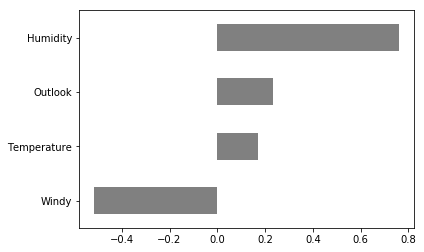

In [18]:
pd.Series(lr.coef_[0], X.columns).sort_values().plot.barh(color='grey');

See the links at the top of this notebook to learn more about categorical encoding for trees.

## Shallow trees are good for fast, first baselines, and to look for "leakage"

> Make sure your training features do not contain data from the “future” (aka time traveling). While this might be easy and obvious in some cases, it can get tricky. ... If your test metric becomes really good all of the sudden, ask yourself what you might be doing wrong. Chances are you are time travelling or overfitting in some way. - [Xavier Amatriain](https://www.quora.com/What-are-some-best-practices-for-training-machine-learning-models/answer/Xavier-Amatriain)

We can test this with the [UCI repository's Bank Marketing dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). It has a feature which leaks information from the future and should be dropped:

> 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if `duration=0` then `y='no'`). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input ... should be discarded if the intention is to have a realistic predictive model.

So let's download the data (or load from this repo) ...

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip
%cd bank-additional

... and train a shallow tree baseline (`max_depth=2`), without dropping the `duration` feature.

In [19]:
import category_encoders as ce
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('datasets/bank-additional-full.csv', sep=';')
X = df.drop(columns='y')
y = df['y'] == 'yes'

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

pipe = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    DecisionTreeClassifier(max_depth=2)
)

cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

array([0.85309963, 0.86704028, 0.85589586, 0.85229795, 0.86402673])

This baseline has a ROC AUC score above 0.85, and it uses the `duration` feature, as well as `nr.employed`, a "social and economic context attribute" for "number of employees - quarterly indicator."

In [20]:
pipe.fit(X_train, y_train)
tree = pipe.named_steps['decisiontreeclassifier']
encoder = pipe.named_steps['onehotencoder']
feature_names = encoder.transform(X_train).columns
feature_names[tree.feature_importances_ > 0]

Index(['duration', 'nr.employed'], dtype='object')

We can visualize the tree:

In [ ]:
from dtreeviz.trees import dtreeviz

class_names = ['No', 'Yes']
dtreeviz(tree, encoder.transform(X_train), y_train, 
         target_name='Subscribed',
         feature_names=list(feature_names), 
         class_names=class_names)

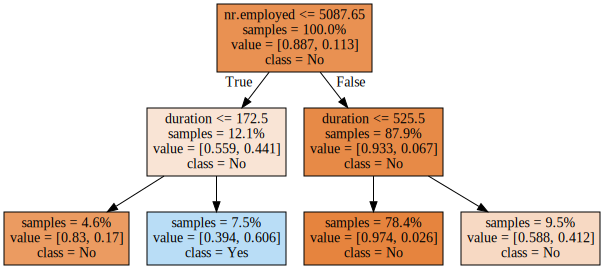

In [26]:
import graphviz
from sklearn.tree import export_graphviz

class_names = ['No', 'Yes']
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=feature_names, class_names=class_names, 
                           filled=True, impurity=False, proportion=True)

graphviz.Source(dot_data)

When the `duration` feature is dropped, the ROC AUC score drops from ~0.85 to ~0.75

In [27]:
X_train = X_train.drop(columns='duration')
cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc')

array([0.75192356, 0.73669375, 0.7473569 , 0.73692904, 0.74700667])

### ROC AUC

[Wikipedia explains,](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) "A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings."

ROC AUC is the area under the ROC curve. [It can be interpreted](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it) as "the expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative." 

ROC AUC measures how well a classifier ranks predicted probabilities. It ranges from 0 to 1. A naive majority class baseline will have an ROC AUC score of 0.5. 

Area under the Receiver Operating Characteristic curve: 0.7404622305997627


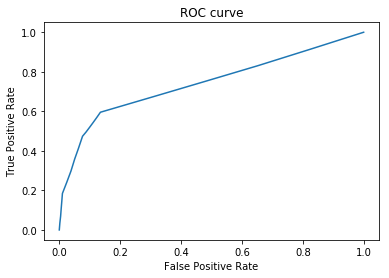

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

y_pred_proba = cross_val_predict(pipe, X_train, y_train, cv=5, n_jobs=-1, 
                                 method='predict_proba')[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_train, y_pred_proba))

In [29]:
pd.DataFrame({'False Positive Rate': fpr, 
              'True Positive Rate': tpr, 
              'Threshold': thresholds})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.714088
1,0.001847,0.034752,0.714088
2,0.004344,0.068966,0.709202
3,0.006225,0.107220,0.693569
4,0.008174,0.143588,0.692588
5,0.010295,0.184537,0.690387
6,0.024454,0.240571,0.361076
7,0.038306,0.297683,0.356931
8,0.050619,0.358836,0.354826
9,0.062624,0.411099,0.353764
